### Import Block

In [2]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data loading

Train and Test sets can be found in the `Resources` folder. You can choose to visualize your data all at once, in windows, or only considering a subset of sensors to detect which ones would prove most useful to your analysis.
An example of such a visualization can be found in the following cell.

In [3]:
train_file_path = 'lab2_train.csv'

train_data = pd.read_csv(train_file_path, delimiter=',')

### Familiarization

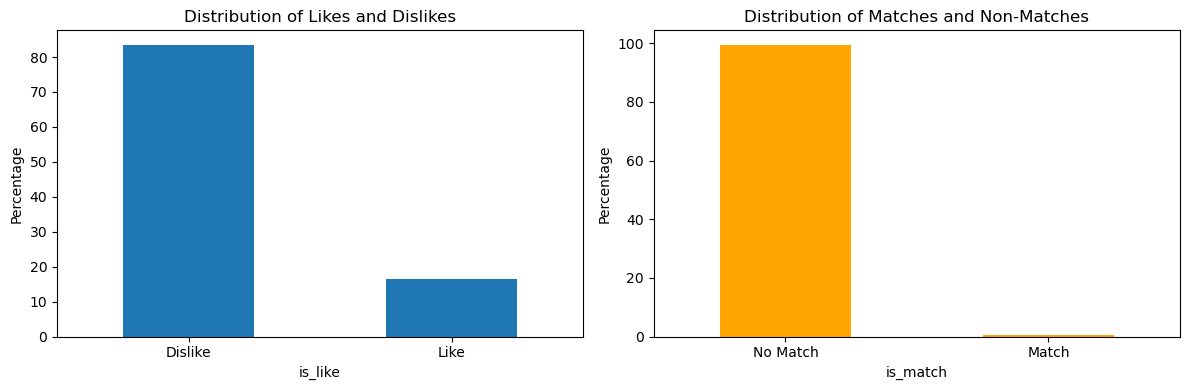

In [7]:
like_counts = train_data['is_like'].value_counts(normalize=True) * 100
match_counts = train_data['is_match'].value_counts(normalize=True) * 100

# Plot the distribution of likes and dislikes
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
like_counts.plot(kind='bar', rot=0)
plt.title('Distribution of Likes and Dislikes')
plt.xlabel('is_like')
plt.ylabel('Percentage')
plt.xticks(range(len(like_counts.index)), ['Dislike', 'Like'])

# Plot the distribution of matches and non-matches
plt.subplot(1, 2, 2)
match_counts.plot(kind='bar', rot=0, color='orange')
plt.title('Distribution of Matches and Non-Matches')
plt.xlabel('is_match')
plt.ylabel('Percentage')
plt.xticks(range(len(match_counts.index)), ['No Match', 'Match'])

plt.tight_layout()
plt.show()

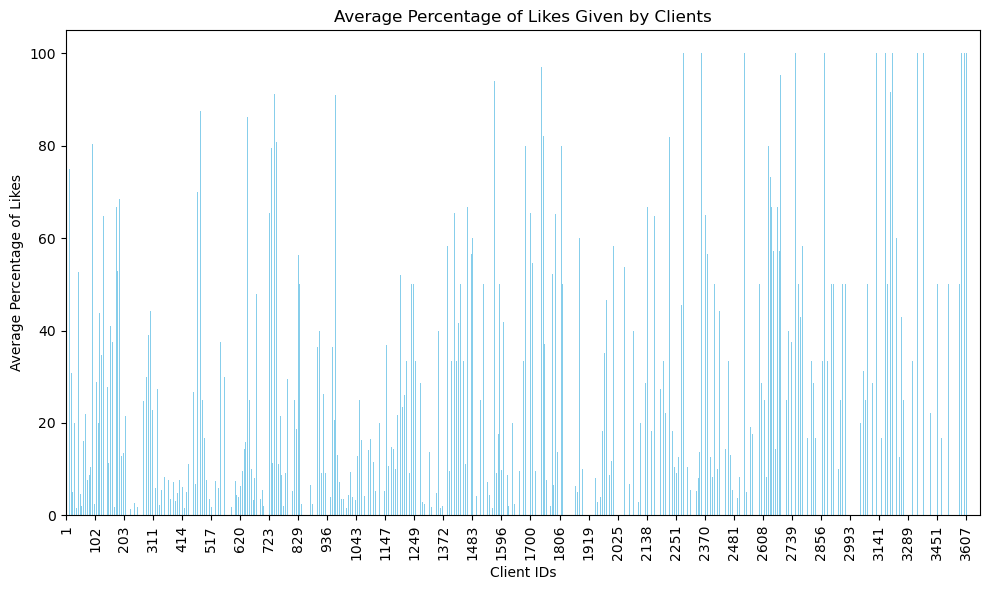

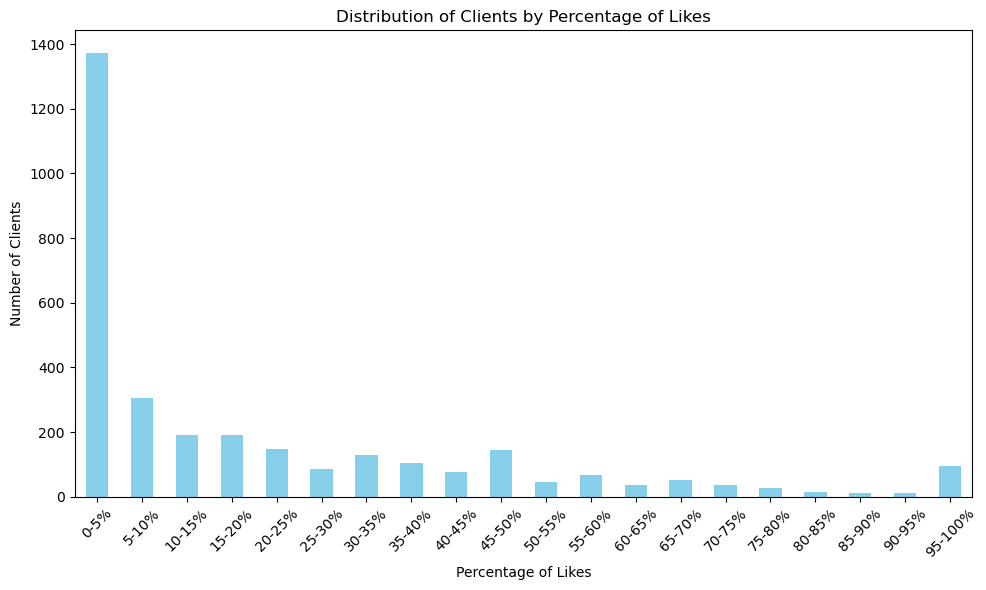

In [23]:
like_percentage = train_data.groupby('user_from_id')['is_like'].mean() * 100

# Plotting
plt.figure(figsize=(10, 6))
like_percentage.sort_index().plot(kind='bar', color='skyblue')

# Choose the step for x-axis labels
step = 100
plt.xticks(range(0, len(like_percentage), step), like_percentage.index[::step], rotation=90)

plt.title('Average Percentage of Likes Given by Clients')
plt.xlabel('Client IDs')
plt.ylabel('Average Percentage of Likes')
plt.tight_layout()
plt.show()

# Bin the percentages into 5% intervals
bins = range(0, 101, 5)
labels = [f'{i}-{i+5}%' for i in range(0, 100, 5)]
like_percentage['percentage_bins'] = pd.cut(like_percentage, bins=bins, labels=labels, include_lowest=True)

# Count the number of clients in each percentage bin
bin_counts = like_percentage['percentage_bins'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Clients by Percentage of Likes')
plt.xlabel('Percentage of Likes')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()